<a href="https://colab.research.google.com/github/Nisarg03/Data-Science-Projects/blob/main/Covid_19_India_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [3]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178901,178901,178905,178919,178922,178981,179010,179017,179131,179169
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275191,275211,275266,275310,275341,275366,275372,275416,275440,275485
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265782,265782,265786,265791,265794,265798,265800,265804,265806,265808
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41349,41717,41717,41717,41717,41717,41717,41717,41717,42156
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [4]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

In [5]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Ningxia                         1
New Caledonia                   1
Mayotte                         1
Martinique                      1
                               ..
Gansu                           1
Fujian                          1
Chongqing                       1
Beijing                         1
Turks and Caicos Islands        1
Name: Province/State, Length: 89, dtype: int64

In [7]:
infected[infected['Country/Region']=='India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22
148,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,43088118,43091393,43094938,43098743,43102194,43105401,43107689,43110586,43113413,43116254


In [8]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,178901,178901,178905,178919,178922,178981,179010,179017,179131,179169
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,275191,275211,275266,275310,275341,275366,275372,275416,275440,275485
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,265782,265782,265786,265791,265794,265798,265800,265804,265806,265808
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,41349,41717,41717,41717,41717,41717,41717,41717,41717,42156
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


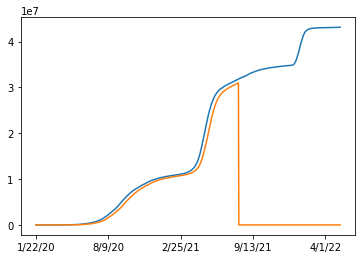

In [9]:
infected.loc['India'][2:].plot()
recovered.loc['India'][2:].plot()
plt.show()

In [10]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

In [11]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('India')
df

,infected,recovered,deaths
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2022-05-08,43105401,0,524093
2022-05-09,43107689,0,524103
2022-05-10,43110586,0,524157
2022-05-11,43113413,0,524181


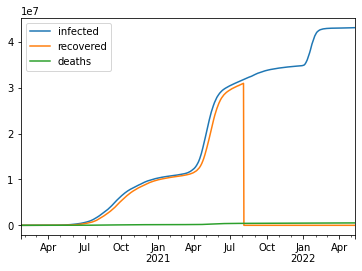

In [12]:
df.plot()
plt.show()

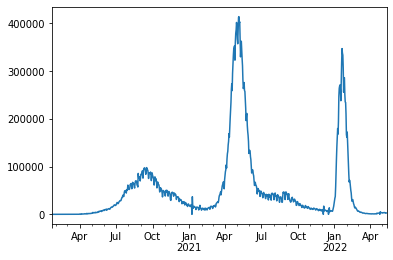

In [13]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

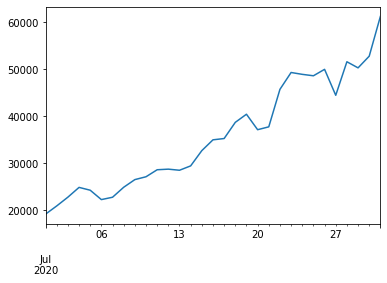

In [14]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

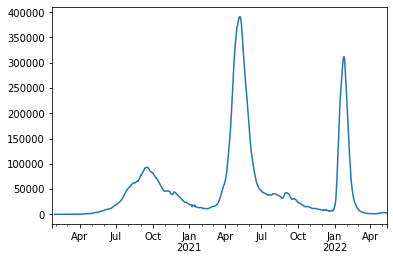

In [15]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

In [16]:

countries = pd.read_csv(countries_dataset_url)
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4312,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4313,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4314,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4315,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


### Computing RT

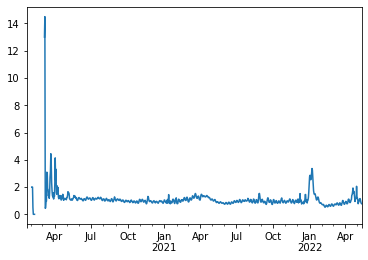

In [18]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

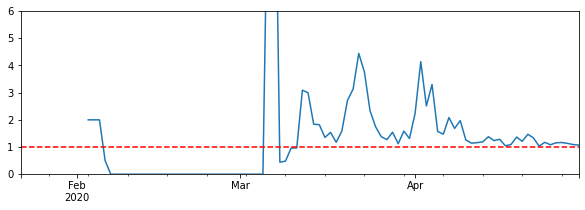

In [19]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

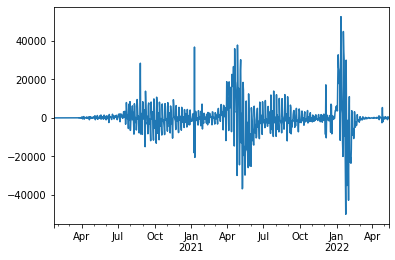

In [20]:
df['ninfected'].diff().plot()
plt.show()

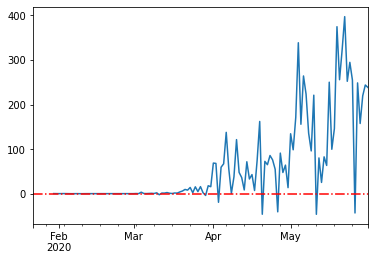

In [21]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()